In [115]:
//---- imports for HIPO4 library
import org.jlab.jnp.hipo4.io.*;
import org.jlab.jnp.hipo4.data.*;
//---- imports for GROOT library
import org.jlab.groot.data.*;
import org.jlab.groot.graphics.*;
//---- imports for PHYSICS library
import org.jlab.jnp.physics.*;
import org.jlab.jnp.reader.*;


HipoReader reader = new HipoReader(); // Create a reader obejct
reader.open("/home/jnp/data/out_6489_2xx_moremorebanks.hipo"); // open a file

reader:: *****>>>>> openning file : /home/jnp/data/out_6489_2xx_moremorebanks.hipo
reader:: ***** dictionary entries :            6
scanning trailer : # bytes = 8248
reader:: ***** number of  records :          257
reader:: ***** number of  events  :      1702511


In [116]:
Event     event = new Event();
Bank  particles = new Bank(reader.getSchemaFactory().getSchema("REC::Particle"));
Bank calos      = new Bank(reader.getSchemaFactory().getSchema("REC::Calorimeter"));

In [117]:
EventFilter  nDVCSFilter = new EventFilter("11:2112:22:Xn:X-");
EventFilter  pDVCSFilter = new EventFilter("11:2212:22:Xn:X-");
EventFilter  cohDVCSFilter = new EventFilter("11:45:22:Xn:X-");
EventFilter  elecFilter = new EventFilter("11:Xn:X+:X-");

In [118]:
reader.getEvent(event,0); //Reads the first event and resets to the begining of the file
int times=0;
LorentzVector  vBeam   = new LorentzVector(0.0,0.0,10.6,10.6);
LorentzVector  vTarget = new LorentzVector(0.0,0.0,0.0,0.938);
LorentzVector  velectron = new LorentzVector();
LorentzVector  vproton = new LorentzVector();
Particle  proton = new Particle();
Particle neutron = new Particle();
Particle deuteron = new Particle();
Particle electron = new Particle();
LorentzVector       vW = new LorentzVector();
LorentzVector      vQ2 = new LorentzVector();
double Xbj;
int nelec=0;
int ndvcs=0;

In [92]:
reader.nextEvent(event);
event.read(particles);
//event.read(calos);
particles.show();
calos.show();
System.out.println("n rows  part : " + particles.getRows());
System.out.println("n rows  calo : " + calos.getRows());
System.out.println("pid of xx.   : " + particles.getInt("pid",3));
//calos.show();

* NODE * group =    300, item =  31, type = 11, size =       39
           pid :         11
            px :     0.5484
            py :    -0.1037
            pz :     1.0404
            vx :    -0.7944
            vy :    -4.1260
            vz :    44.1444
        charge :         -1
          beta :     1.0000
       chi2pid :    -0.8204
        status :      -2211

* NODE * group =      0, item =   0, type =  0, size =        0
         index : 
        pindex : 
      detector : 
        sector : 
         layer : 
        energy : 
          time : 
          path : 
          chi2 : 
             x : 
             y : 
             z : 
            hx : 
            hy : 
            hz : 
            lu : 
            lv : 
            lw : 
            du : 
            dv : 
            dw : 
           m2u : 
           m2v : 
           m2w : 
           m3u : 
           m3v : 
           m3w : 
        status : 

n rows  part : 1
n rows  calo : 0
pid of xx.   : 106569188

In [119]:
// histos
H1F W = new H1F("W" ,100, 0.5, 4.0);
W.setTitleX("W [GeV]");
H1F Q2 = new H1F("Q2",100, 0.1, 4.0);
Q2.setTitleX("Q^2 [GeV/c^2]");
H2F WvsQ2 = new H2F("W vs Q2", "W vs Q2", 100,0,5,100,0,10);
WvsQ2.setTitleX("W [GeV]");
WvsQ2.setTitleY("Q^2 [GeV/c^2]");
H2F ThvsPhi = new H2F("Theta vs Phi","Theta vs Phi",100,-180,180,100,0,180);
ThvsPhi.setTitleX("Phi [Degrees]");
ThvsPhi.setTitleY("Theta [Degrees]");
H2F Q2vsXbj = new H2F("Q2 vs Xbj","Q2 vs Xbj",100,0,10,100,0,1);
Q2vsXbj.setTitleX("Q^2 [GeV/c^2]");
Q2vsXbj.setTitleY("Xbj");

In [114]:
while(reader.hasNext()==true){
    
    reader.nextEvent(event);
    event.read(particles);
    
    PhysicsEvent physEvent = DataManager.getPhysicsEvent(10.6,particles);
    if(elecFilter.isValid(physEvent)==true){
        nelec++;
        electron = physEvent.getParticleByPid(11,0);
        velectron.setPxPyPzM(electron.px(),electron.py(),electron.pz(),0.0005);
        //velectron.setPxPyPzM(particles.getFloat("px",0),particles.getFloat("py",0),particles.getFloat("pz",0),0.0005);
        vW.copy(vBeam);
        //vW.add(vTarget).sub(electron.vector());
        vW.add(vTarget).sub(velectron);
        W.fill(vW.mass());
        vQ2.copy(vBeam);
        //vQ2.sub(electron.vector());
        vQ2.sub(velectron);
        Q2.fill(-vQ2.mass2());
        WvsQ2.fill(vW.mass(),-vQ2.mass2());
        
        if(nDVCSFilter.isValid(physEvent)==true && -vQ2.mass2()>1 && vW.mass()>2){
            ndvcs++;
            proton = physEvent.getParticleByPid(2212,0);
        
            //Xbj = (-vQ2.mass2())/(2*proton.mass()*(vBeam.p()-electron.vector().p()));
            Xbj = (-vQ2.mass2())/(2*proton.mass()*(vBeam.p()-velectron.p()));
    
            //pXbj = (-vpQ2.mass2())/(2*proton.mass()*(vBeam.p()-electron.p()));
            //     pQ2vsXbj.fill(-vpQ2.mass2(),pXbj);
    

        
            Q2vsXbj.fill(-vQ2.mass2(),Xbj);   
    
            //neutron = physEvent.getParticleByPid(2112,0);
            //ThvsPhi.fill(neutron.phi()*180./Math.PI,neutron.theta()*180./Math.PI);

            //proton = physEvent.getParticleByPid(2212,0);
            //ThvsPhi.fill(proton.phi()*180./Math.PI,proton.theta()*180./Math.PI);

            //deuteron = physEvent.getParticleByPid(45,0);
            //ThvsPhi.fill(deuteron.phi()*180/Math.PI,deuteron.theta()*180./Math.PI);


    
            //times++;
            //System.out.println("loop has looped " + times + "times");
        
        }
    }
}
System.out.println("electrons  : " + nelec);
System.out.println("dvcs events: " + ndvcs);

electrons  : 557717
dvcs events: 29511


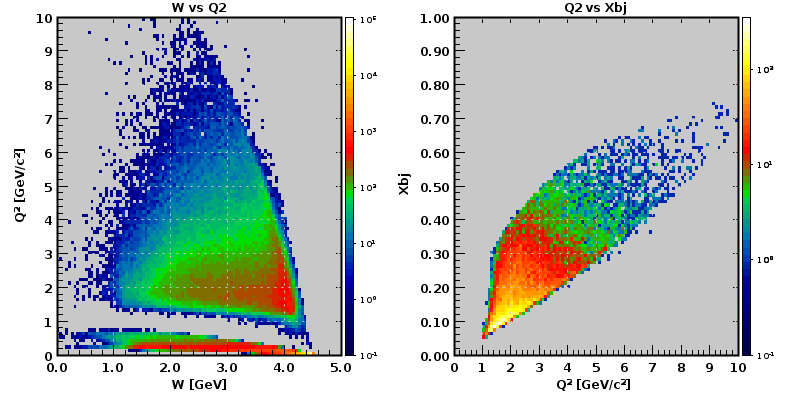

In [115]:
EmbeddedCanvas ec = new EmbeddedCanvas(800,400);
ec.divide(2,1);
ec.getPad(0).getAxisZ().setLog(true);
ec.cd(0).draw(WvsQ2);
ec.getPad(1).getAxisZ().setLog(true);
ec.cd(1).draw(Q2vsXbj);
//ec.cd(2).draw(ThvsPhi);
//ec.cd(3).draw();

ec.getScreenShot();


In [120]:
while(reader.hasNext()==true){
    reader.nextEvent(event);
    event.read(particles);
    
    PhysicsEvent physEvent = DataManager.getPhysicsEvent(10.6,particles);
        if(particles.getRows()>0){
        for(int npart=0 ; npart<particles.getRows(); npart++){
        int pid = particles.getInt("pid",npart);
        if(pid==11){
           nelec++;
        
            //electron = physEvent.getParticleByPid(11,0);
            //velectron.setPxPyPzM(electron.px(),electron.py(),electron.pz(),0.0005);
            velectron.setPxPyPzM(particles.getFloat("px",npart),
                                 particles.getFloat("py",npart),
                                 particles.getFloat("pz",npart),
                                 0.0005);
            vW.copy(vBeam);
            //vW.add(vTarget).sub(electron.vector());
            vW.add(vTarget).sub(velectron);
            W.fill(vW.mass());
            vQ2.copy(vBeam);
            //vQ2.sub(electron.vector());
            vQ2.sub(velectron);
            Q2.fill(-vQ2.mass2());
            WvsQ2.fill(vW.mass(),-vQ2.mass2());
        
            if(pDVCSFilter.isValid(physEvent)==true && -vQ2.mass2()>1 && vW.mass()>2){
                ndvcs++;
                for(int nnpart=0 ; nnpart<particles.getRows(); nnpart++){
                int ppid = particles.getInt("pid",nnpart);
                    if(ppid==2212){
                        //proton = physEvent.getParticleByPid(2212,0);
                        vproton.setPxPyPzM(particles.getFloat("px",nnpart),
                                 particles.getFloat("py",nnpart),
                                 particles.getFloat("pz",nnpart),
                                 0.938);
        
                        //Xbj = (-vQ2.mass2())/(2*proton.mass()*(vBeam.p()-electron.vector().p()));
                        Xbj = (-vQ2.mass2())/(2*vproton.mass()*(vBeam.p()-velectron.p()));
    
               //pXbj = (-vpQ2.mass2())/(2*proton.mass()*(vBeam.p()-electron.p()));
               //     pQ2vsXbj.fill(-vpQ2.mass2(),pXbj);
    
                        
                        Q2vsXbj.fill(-vQ2.mass2(),Xbj); 
            
                       
                    }
                  
                
                    }
                }
            }
        }
    }
}
System.out.println("xbj: " + Xbj);
System.out.println("electrons  : " + nelec);
System.out.println("dvcs events: " + ndvcs);

xbj: 0.3667417604316448
electrons  : 662186
dvcs events: 21862


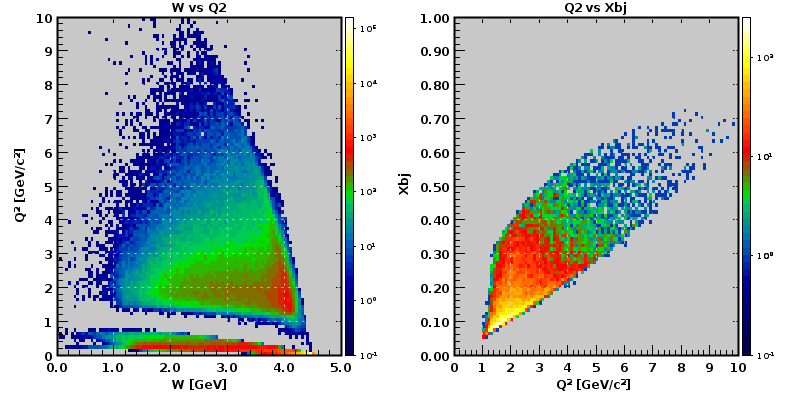

In [121]:
EmbeddedCanvas ec = new EmbeddedCanvas(800,400);
ec.divide(2,1);
ec.getPad(0).getAxisZ().setLog(true);
ec.cd(0).draw(WvsQ2);
ec.getPad(1).getAxisZ().setLog(true);
ec.cd(1).draw(Q2vsXbj);
//ec.cd(2).draw(ThvsPhi);
//ec.cd(3).draw();

ec.getScreenShot();


In [ ]:
//neutron = physEvent.getParticleByPid(2112,0);
                //ThvsPhi.fill(neutron.phi()*180./Math.PI,neutron.theta()*180./Math.PI);

                //proton = physEvent.getParticleByPid(2212,0);
                //ThvsPhi.fill(proton.phi()*180./Math.PI,proton.theta()*180./Math.PI);

                //deuteron = physEvent.getParticleByPid(45,0);
                //ThvsPhi.fill(deuteron.phi()*180/Math.PI,deuteron.theta()*180./Math.PI);


    
                //times++;
                //System.out.println("loop has looped " + times + "times");